**Metodologia**

1. Seleção da técnica: Para converter o conjunto de dados misto em um conjunto totalmente numérico, foi aplicada redução de dimensionalidade. Embora exista uma técnica específica para dados mistos (FAMD), optou-se pela abordagem de Alvarez-Garcia, Ibar-Alonso e Arenas-Parra (2024), que aplica PCA às variáveis numéricas e MCA às categóricas de forma independente. Essa escolha se justifica por dois motivos:
(a) preservar a interpretabilidade dos componentes principais, já que as variáveis numéricas se referem ao desempenho acadêmico e as categóricas a características sociodemográficas;
(b) facilitar a avaliação do peso relativo dos efeitos numéricos e categóricos no resultado.

2. Aplicação da técnica: A redução foi implementada com o pacote disponibilizado por Alvarez-Garcia (scripts>>dimensionality_reduction). O pacote original está disponível em https://pypi.org/project/clust-learn/. Não foi definido um limiar mínimo de variância explicada; o número ideal de componentes foi determinado automaticamente pelo método kneedle aplicado à curva de variância.

3. Análise das contribuições: Após a transformação, realizou-se uma análise para identificar quais variáveis originais mais contribuíram para a formação de cada um dos cinco componentes resultantes.

4. Análise dos componentes: Foram calculadas estatísticas descritivas de cada componente para avaliar seu nível de variância, informação essencial para compreender o peso de cada um em algoritmos baseados em métricas de distância.

In [1]:
import sys
import os
import pandas as pd 

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.dimensionality_reduction.dimensionality_reduction import DimensionalityReduction

In [2]:
df_full = pd.read_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_RJ_clean_2023.csv')
df = df_full.drop("CO_MUNICIPIO_PROVA", axis=1)

In [3]:
vars_num = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

vars_cat = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

In [4]:
dr = DimensionalityReduction(df, num_vars=vars_num, cat_vars=vars_cat)

In [5]:
t = dr.transform(min_explained_variance_ratio=None)

In [6]:
dr.n_components_

5

In [7]:
print(dr.num_components_, dr.cat_components_)

['dim_01', 'dim_02'] ['dim_03', 'dim_04', 'dim_05']


In [8]:
dr.num_main_contributors()

,component,var_name,corr_coeff
0,dim_01,NU_NOTA_CH,0.862925
1,dim_01,NU_NOTA_LC,0.847208
2,dim_01,NU_NOTA_MT,0.845047
3,dim_01,NU_NOTA_CN,0.830371
4,dim_01,NU_NOTA_REDACAO,0.700468
5,dim_02,NU_NOTA_REDACAO,0.697389


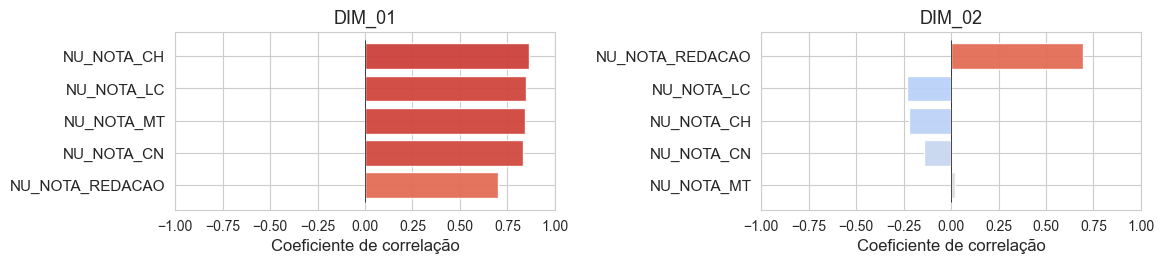

In [9]:
dr.plot_num_main_contributors(n_contributors=5)

In [10]:
dr.cat_main_contributors(n_contributors=4)

,component,var_name,corr_ratio
0,dim_03,Q006,0.672589
1,dim_03,Q003,0.515433
2,dim_03,Q004,0.485294
3,dim_03,Q001,0.481180
4,dim_04,Q006,0.358901
5,dim_04,Q003,0.312015
6,dim_04,Q004,0.270864
7,dim_04,Q001,0.226272
8,dim_05,TP_FAIXA_ETARIA,0.435705
9,dim_05,TP_ST_CONCLUSAO,0.434968


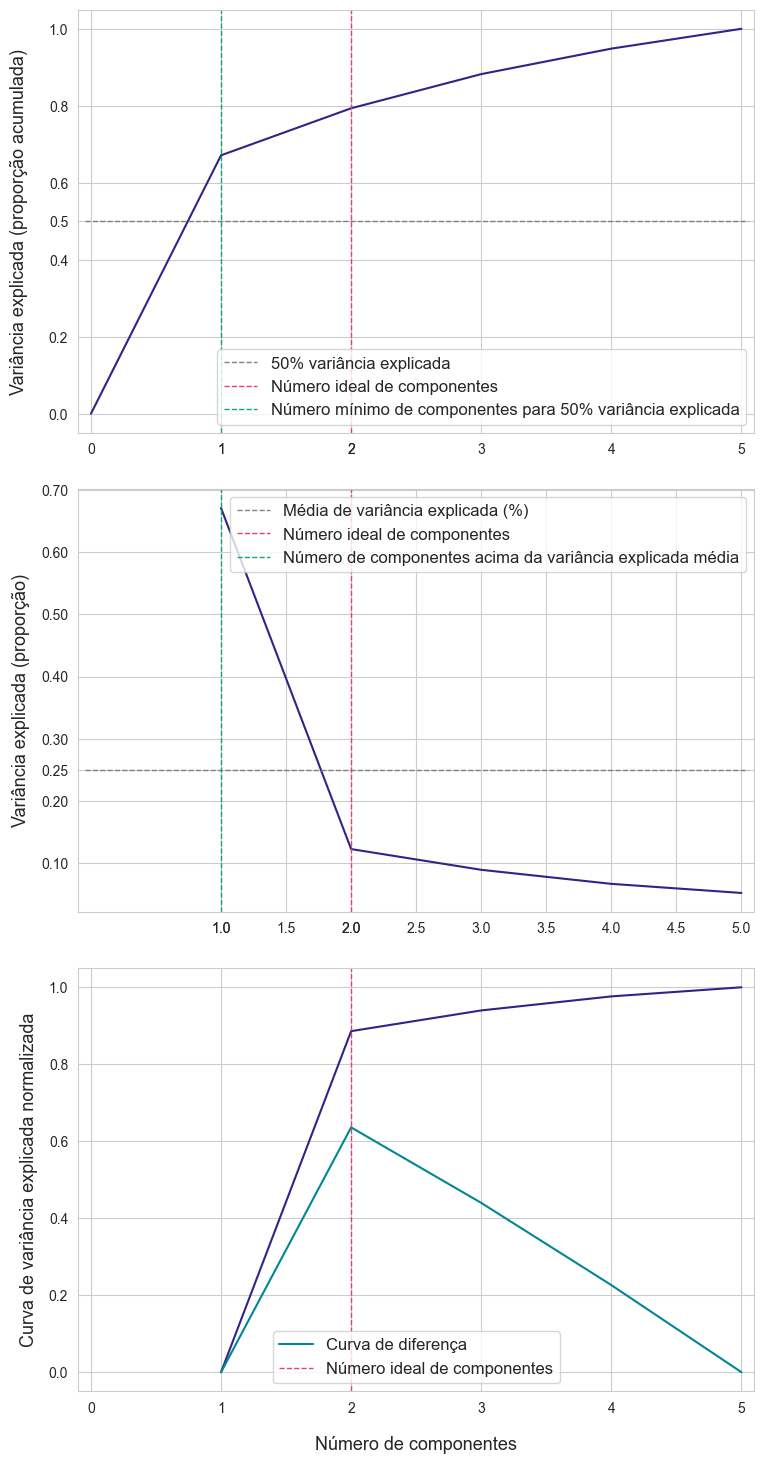

In [11]:
dr.plot_num_explained_variance()

In [12]:
dr.pca_.explained_variance_ratio_
exp_var_comp_1 = dr.pca_.explained_variance_ratio_[0]
exp_var_comp_2 = dr.pca_.explained_variance_ratio_[1]
exp_var = exp_var_comp_1 + exp_var_comp_2
exp_var

np.float64(0.7935040106549934)

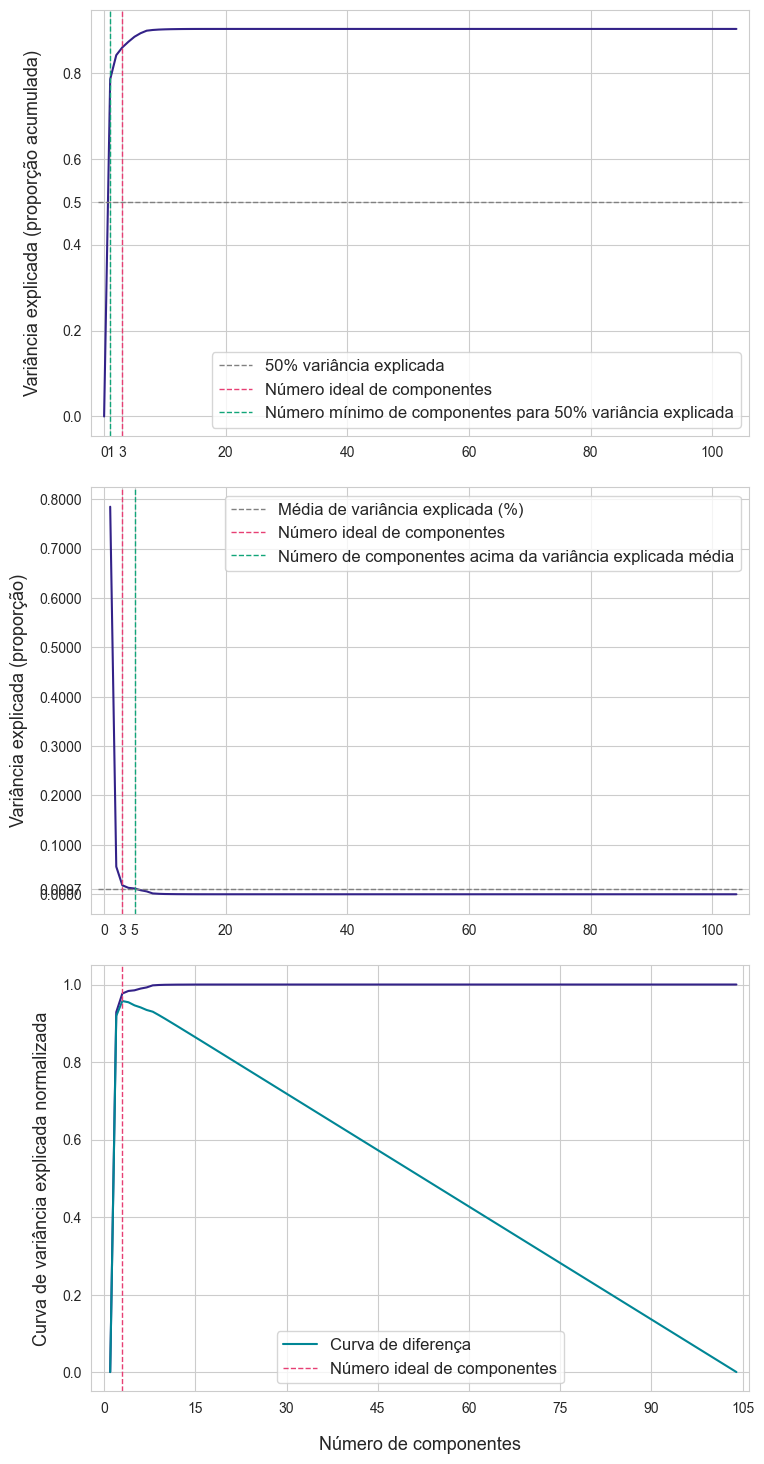

In [13]:
dr.plot_cat_explained_variance()

In [14]:
dr._get_explained_variance_ratio()
exp_cat_comp_1 = dr._get_explained_variance_ratio()[0]
exp_cat_comp_2 = dr._get_explained_variance_ratio()[1]
exp_cat_comp_3 = dr._get_explained_variance_ratio()[2]
exp_cat = exp_cat_comp_1 + exp_cat_comp_2 + exp_cat_comp_3
exp_cat

np.float64(0.8587667376617591)

In [15]:
components = pd.concat([dr.num_trans_, dr.cat_trans_], axis=1)
components.describe()

,dim_01,dim_02,dim_03,dim_04,dim_05
count,1.778280e+05,1.778280e+05,1.778280e+05,1.778280e+05,1.778280e+05
mean,5.114463e-18,-2.557231e-17,1.534339e-17,-8.726552e-17,3.324401e-17
std,1.832129e+00,7.815673e-01,4.662825e-01,2.886536e-01,2.496176e-01
min,-5.600088e+00,-3.905626e+00,-1.441870e+00,-5.553197e-01,-1.314595e+00
25%,-1.332440e+00,-5.298295e-01,-3.075030e-01,-2.049942e-01,-1.735057e-01
50%,-5.294003e-02,1.049530e-02,7.234312e-02,-6.371029e-02,3.297257e-03
75%,1.275972e+00,5.332098e-01,3.509221e-01,1.389107e-01,1.707694e-01
max,6.251964e+00,3.461522e+00,1.512334e+00,2.528143e+00,1.405888e+00


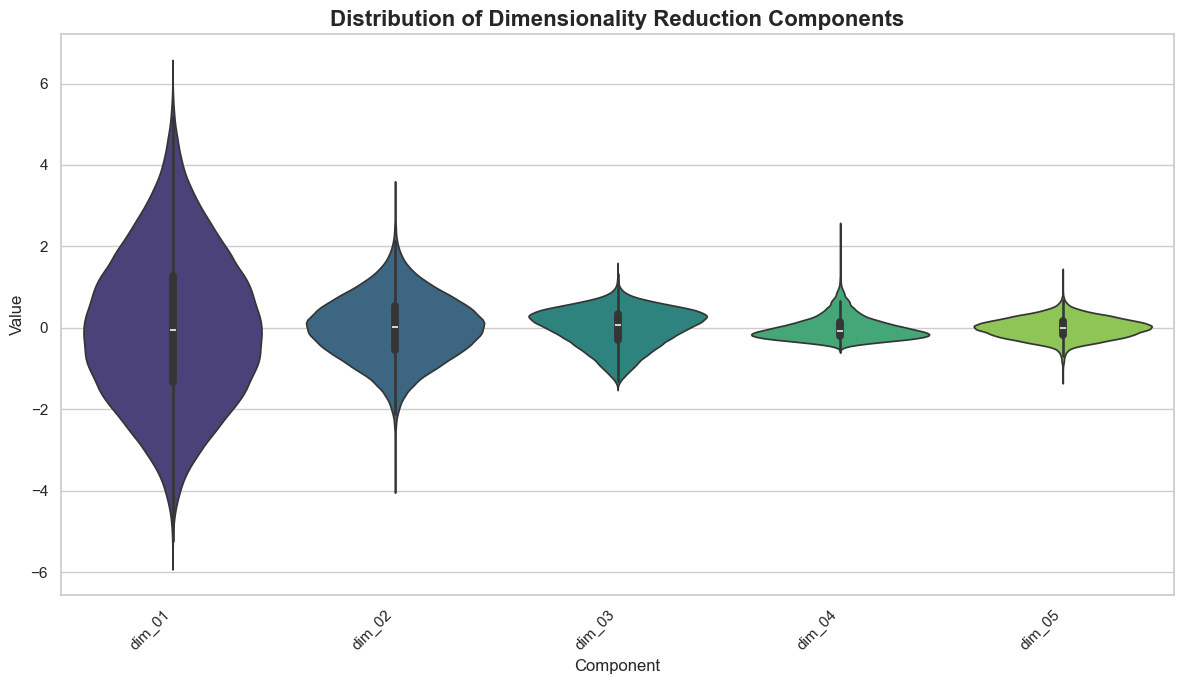

In [16]:
dr.plot_components_violin()

In [17]:
t["CO_MUNICIPIO_PROVA"] = df_full["CO_MUNICIPIO_PROVA"]

In [18]:
t.to_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_RJ_rd_2023.csv', index=False)

Replicação: AM

In [19]:
df_full = pd.read_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_AM_clean_2023.csv')
df = df_full.drop("CO_MUNICIPIO_PROVA", axis=1)

In [20]:
vars_num = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

vars_cat = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

In [21]:
dr = DimensionalityReduction(df, num_vars=vars_num, cat_vars=vars_cat)

In [22]:
t = dr.transform(min_explained_variance_ratio=None)

In [23]:
dr.n_components_

6

In [24]:
print(dr.num_components_, dr.cat_components_)

['dim_01', 'dim_02'] ['dim_03', 'dim_04', 'dim_05', 'dim_06']


In [25]:
dr.num_main_contributors()

,component,var_name,corr_coeff
0,dim_01,NU_NOTA_LC,0.856241
1,dim_01,NU_NOTA_CH,0.855785
2,dim_01,NU_NOTA_MT,0.816640
3,dim_01,NU_NOTA_CN,0.805144
4,dim_01,NU_NOTA_REDACAO,0.708053
5,dim_02,NU_NOTA_REDACAO,0.695285


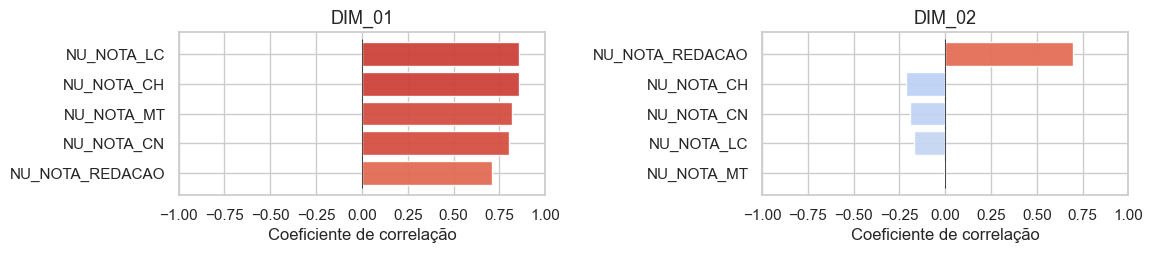

In [26]:
dr.plot_num_main_contributors(n_contributors=5)

In [27]:
dr.cat_main_contributors(n_contributors=4)

,component,var_name,corr_ratio
0,dim_03,Q006,0.606108
1,dim_03,Q003,0.504713
2,dim_03,Q010,0.473325
3,dim_03,Q004,0.461282
4,dim_04,Q003,0.434768
5,dim_04,Q004,0.402460
6,dim_04,Q006,0.258198
7,dim_04,Q001,0.238190
8,dim_05,TP_FAIXA_ETARIA,0.540788
9,dim_05,TP_ST_CONCLUSAO,0.530147


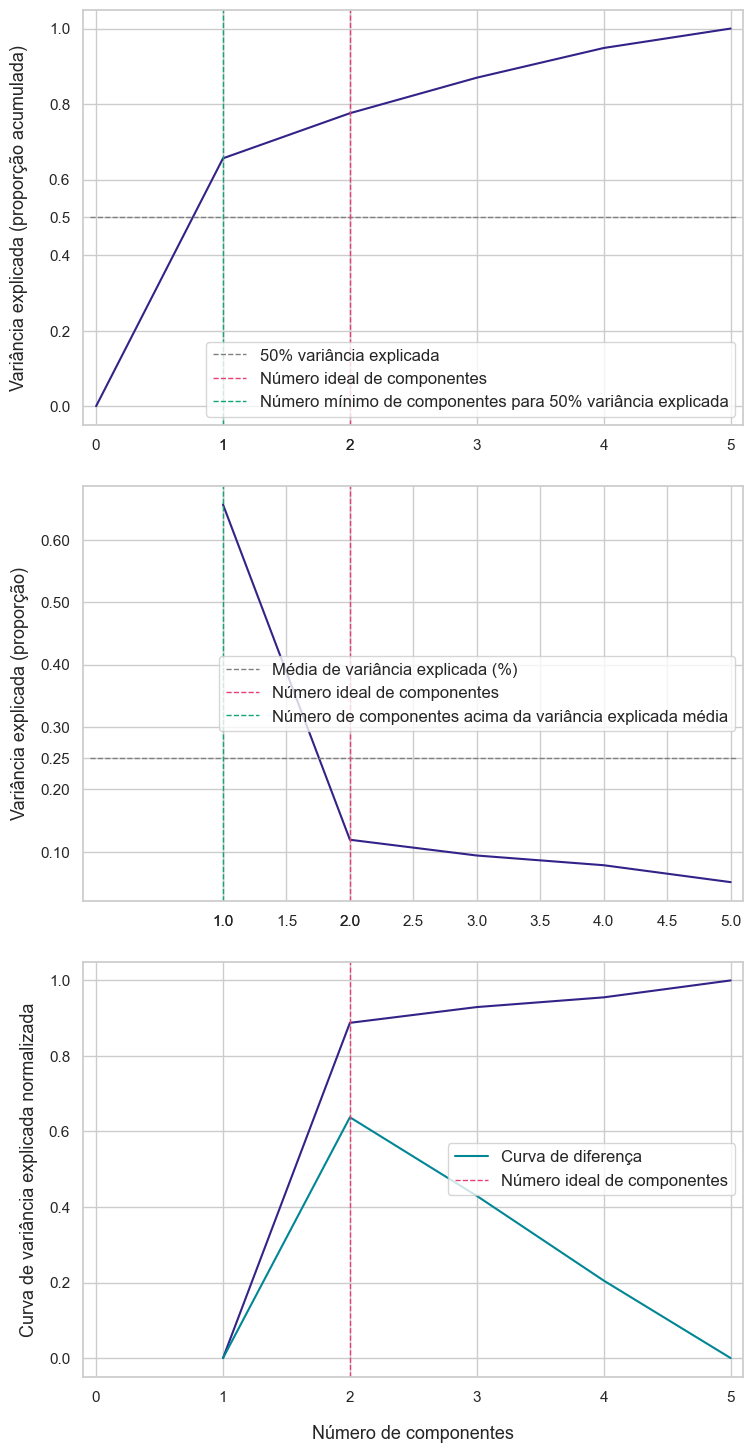

In [28]:
dr.plot_num_explained_variance()

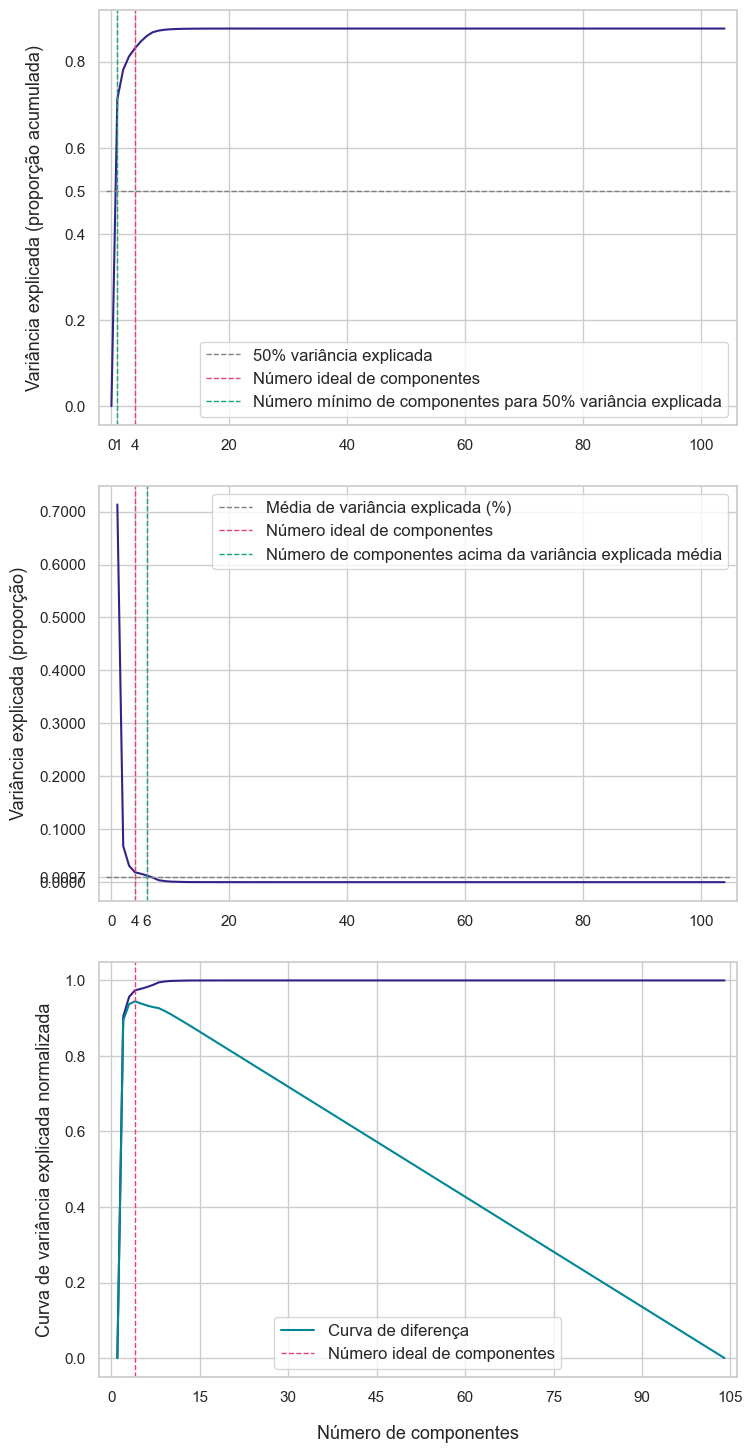

In [29]:
dr.plot_cat_explained_variance()

In [30]:
components = pd.concat([dr.num_trans_, dr.cat_trans_], axis=1)
components.describe()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06
count,4.472000e+04,4.472000e+04,4.472000e+04,4.472000e+04,4.472000e+04,4.472000e+04
mean,-2.542192e-17,-1.016877e-17,-4.575946e-17,-3.177740e-17,1.016877e-16,-7.880796e-17
std,1.811653e+00,7.726360e-01,4.446264e-01,2.914626e-01,2.616684e-01,2.466892e-01
min,-4.598781e+00,-2.915013e+00,-1.183955e+00,-5.002925e-01,-7.557725e-01,-6.555528e-01
25%,-1.322738e+00,-5.184667e-01,-3.116260e-01,-2.132993e-01,-2.073164e-01,-1.714377e-01
50%,-2.093804e-01,-9.626032e-03,-9.900817e-02,-6.753185e-02,2.714031e-02,-3.618323e-02
75%,1.151542e+00,4.978772e-01,2.229435e-01,1.457209e-01,1.711206e-01,1.266842e-01
max,7.021206e+00,3.163529e+00,1.879214e+00,1.789088e+00,1.769185e+00,1.673970e+00


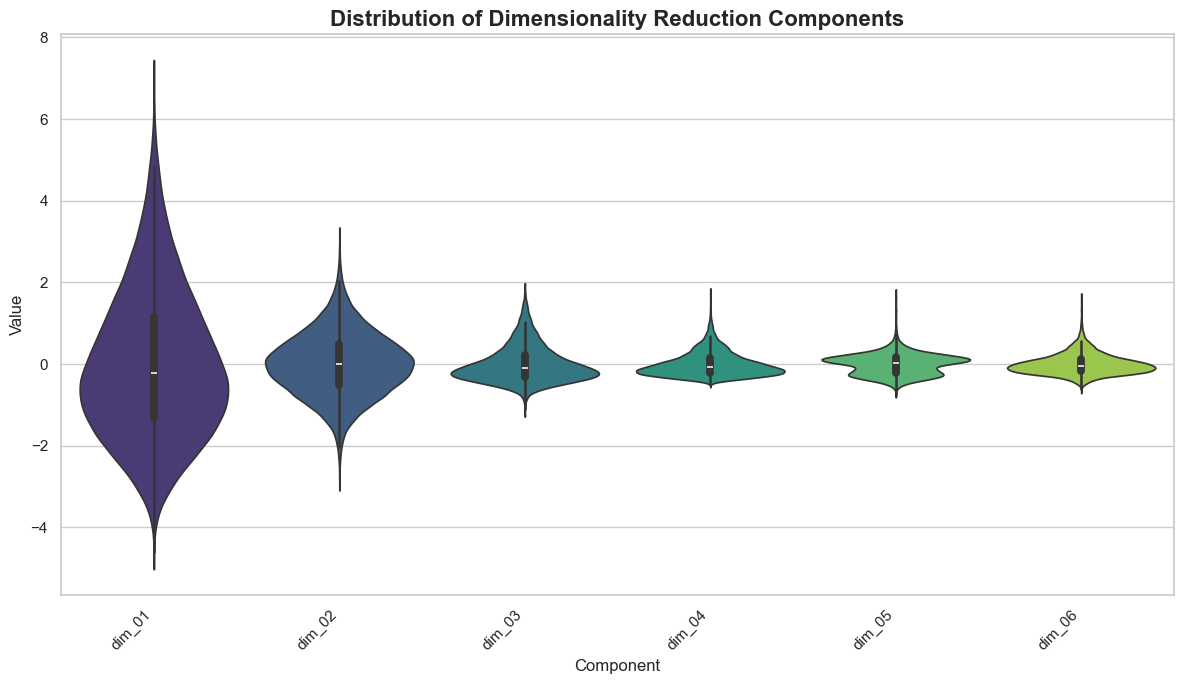

In [31]:
dr.plot_components_violin()

In [32]:
t["CO_MUNICIPIO_PROVA"] = df_full["CO_MUNICIPIO_PROVA"]

In [33]:
t.to_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_AM_rd_2023.csv', index=False)